In [31]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt

In [32]:
image_dir = '/Users/shreyasmishra/Documents/MLCode/CV/Project Task 1/train_data'
label_file = '/Users/shreyasmishra/Documents/MLCode/CV/Project Task 1/train_labels.txt'

In [33]:
class ImageDataset(Dataset):
    def __init__(self, image_dir, label_file, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_filenames = [f for f in sorted(os.listdir(image_dir)) if f.endswith('.jpg')]  
        self.labels = self.load_labels(label_file)
    
    def load_labels(self, label_file):
        with open(label_file, 'r') as f:
            labels = [int(line.strip()) for line in f]  
        return labels
    
    def __len__(self):
        return len(self.image_filenames)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_filenames[idx])
        label = self.labels[idx]
        
        image = Image.open(img_path).convert("RGB")
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [34]:
dataset = ImageDataset(image_dir=image_dir, label_file=label_file, transform=transforms.ToTensor())

In [35]:
dataloader = DataLoader(dataset, batch_size=5, shuffle=True)


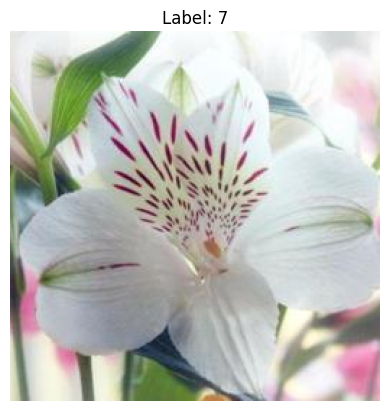

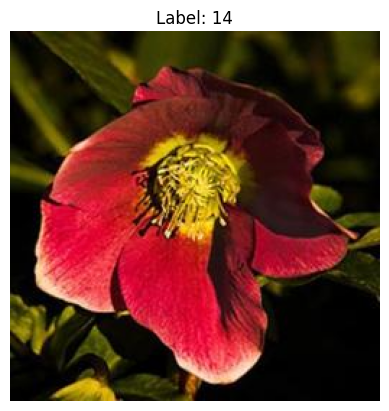

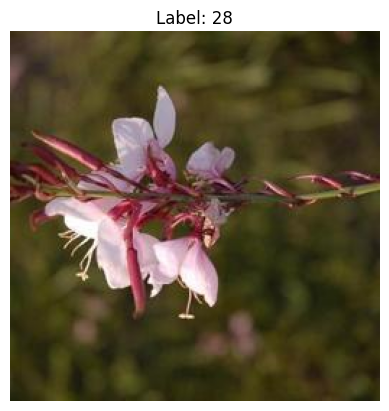

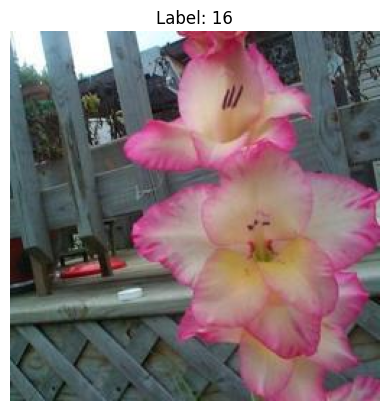

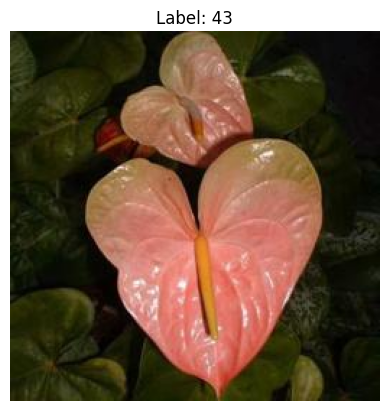

In [36]:
for images, labels in dataloader:
    
    for i in range(5):  
        img = transforms.ToPILImage()(images[i])  
        plt.figure()
        plt.title(f'Label: {labels[i].item()}')  
        plt.imshow(img)
        plt.axis('off')  
        plt.show()
    break